In [27]:
import glob
import pickle
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio, display

# modify this path to where your pickles are stored
data_dir = '../tracks_data/'
pickle_files = glob.glob(f'{data_dir}*_spectrogram.pkl')
print(f'Found {len(pickle_files)} spectrogram pickles')

Found 7997 spectrogram pickles


# Example for a single track

In [30]:
example_path = pickle_files[7996]
with open(example_path, 'rb') as f:
    data = pickle.load(f)

# Inspect keys and shapes
print('Keys in pickle:', data.keys())
spec = data['spectrogram']
print('track_id:', data['track_id'])
print('Spectrogram shape:', spec.shape)
print('Metadata:', data['metadata'])

Keys in pickle: dict_keys(['track_id', 'spectrogram', 'metadata'])
track_id: 155066
Spectrogram shape: (513, 431)
Metadata: {'track_title': 'roy', 'artist_name': 'jblanked', 'genre': 'Hip-Hop', 'genre_id': 3}


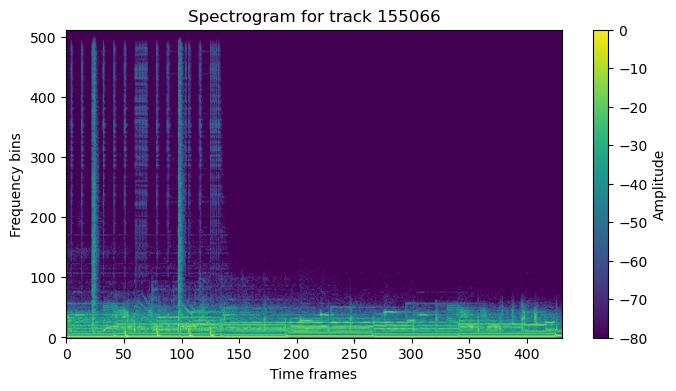

In [31]:
plt.figure(figsize=(8, 4))
plt.imshow(spec, origin='lower', aspect='auto')
plt.title(f"Spectrogram for track {data['track_id']}")
plt.xlabel('Time frames')
plt.ylabel('Frequency bins')
plt.colorbar(label='dB' if '--log_scale' in example_path else 'Amplitude')
plt.show()

# Reconstruction

In [24]:
spec.shape

(513, 431)

In [ ]:
spec_lin = librosa.db_to_amplitude(spec)
y = librosa.griffinlim(
    spec_lin,
    n_fft=1024,
    hop_length=512,
    n_iter=32
)

display(Audio(data=y, rate=22050))

In [9]:
# For memory demo, load first N files
N = min(10, len(pickle_files))
batch = []
meta = []
for path in pickle_files[:N]:
    with open(path, 'rb') as f:
        d = pickle.load(f)
    batch.append(d['spectrogram'])
    meta.append(d['metadata']['genre_id'])
batch_array = np.stack(batch, axis=0)  # shape (N, F, T)
labels = np.array(meta)
print('Batch array shape:', batch_array.shape)
print('Labels:', labels)

Batch array shape: (10, 513, 431)
Labels: [3 3 6 2 2 1 7 2 2 2]
